In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import warnings

In [121]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv("C:/Users/82108/OneDrive/문서/카카오톡 받은 파일/chatgpt_sentiment_demoji.csv")

In [122]:
df

,Text,emoji,negative,neutral,positive,predicted_label,date,likes,location,followers,following,retweets,replies
0,If I were a journalist or reporter writing cli...,NaN,0.952584,0.037600,0.009816,negative,2023-02-10 23:59:49+00:00,1,Fukuoka 福岡 | Japan 日本,2012,388,0,0
1,Imagine if the mid season twist was that theyr...,NaN,0.031874,0.156266,0.811859,positive,2023-02-10 23:59:35+00:00,8,"Manhattan, NY",19855,5722,1,2
2,I see the difference between leader and employ...,NaN,0.158342,0.312784,0.528873,positive,2023-02-10 23:59:18+00:00,4,NaN,23,577,0,1
3,Which means your job is at risk man facepalmin...,['🤦\u200d♂️'],0.161833,0.805698,0.032469,neutral,2023-02-10 23:59:16+00:00,0,NaN,108,224,0,0
4,What have you been using Chatgpt for?,NaN,0.005627,0.968457,0.025916,neutral,2023-02-10 23:59:16+00:00,1,"Chicago, IL",11155,478,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975445,"Just launched ChatGPT, our new AI system which...",NaN,0.004002,0.014325,0.981673,positive,2022-11-30 18:06:29+00:00,2370,NaN,203790,66,371,84
975446,"THRILLED to share that ChatGPT, our new model ...",NaN,0.005804,0.015195,0.979001,positive,2022-11-30 18:05:58+00:00,559,neighborhoodsf.com (sf),1572,604,67,26
975447,ChatGPT: Optimizing Language Models for Dialog...,NaN,0.003987,0.884664,0.111349,neutral,2022-11-30 18:02:58+00:00,2,The Internet,475,13,1,0
975448,"Try talking with ChatGPT, our new AI system wh...",NaN,0.003811,0.017800,0.978389,positive,2022-11-30 18:02:06+00:00,13597,NaN,1492374,0,3504,1313


In [123]:
df.describe()

,negative,neutral,positive,likes,followers,following,retweets,replies
count,975450.000000,975450.000000,975450.000000,975450.000000,9.754500e+05,9.754500e+05,975450.000000,975450.000000
mean,0.230154,0.429948,0.339897,11.961189,3.231735e+04,1.573738e+03,1.765541,1.114315
std,0.351496,0.372162,0.376154,355.771275,7.281230e+05,9.618419e+03,57.776420,36.731214
min,0.001543,0.005018,0.003674,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.007246,0.051826,0.019041,0.000000,8.600000e+01,1.480000e+02,0.000000,0.000000
50%,0.027923,0.339673,0.118635,1.000000,4.390000e+02,4.600000e+02,0.000000,0.000000
75%,0.279596,0.843093,0.744464,2.000000,2.041000e+03,1.214000e+03,0.000000,1.000000
max,0.986359,0.993227,0.990427,111653.000000,1.287402e+08,1.526451e+06,13072.000000,19942.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975450 entries, 0 to 975449
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Text             975053 non-null  object 
 1   emoji            125629 non-null  object 
 2   negative         975450 non-null  float64
 3   neutral          975450 non-null  float64
 4   positive         975450 non-null  float64
 5   predicted_label  975450 non-null  object 
 6   date             975450 non-null  object 
 7   likes            975450 non-null  int64  
 8   location         705265 non-null  object 
 9   followers        975450 non-null  int64  
 10  following        975450 non-null  int64  
 11  retweets         975450 non-null  int64  
 12  replies          975450 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 96.7+ MB


In [125]:
df.isnull().sum()

Text                  397
emoji              849821
negative                0
neutral                 0
positive                0
predicted_label         0
date                    0
likes                   0
location           270185
followers               0
following               0
retweets                0
replies                 0
dtype: int64

In [126]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [128]:
df["count"] = df.groupby("Text")["Text"].transform("count")
wc = df.set_index("Text").to_dict()["count"]

In [129]:
# 결측치 처리
df_cleaned = df.copy()
df_cleaned['Text'].fillna('',inplace=True) # 텍스트 결측치는 빈 문자열로 대체
df_cleaned['emoji'].fillna('[]', inplace=True)  # 이모지는 빈 리스트 문자열로 대체
df_cleaned['location'].fillna('Unknown', inplace=True)  # 위치 정보 결측치는 'Unknown'으로 대체

In [130]:
# 날짜 데이터 타입 변환 
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

In [131]:
# 중복 데이터 제거
df_cleaned.drop_duplicates(subset=['Text', 'date'], keep='first', inplace=True)

In [132]:
# 필요 없는 공백 제거 
df_cleaned['Text'] = df_cleaned['Text'].str.strip()

In [133]:
# 감성 점수 정규화
df_cleaned['sentiment_score'] = df_cleaned['positive'] - df_cleaned['negative']

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SY

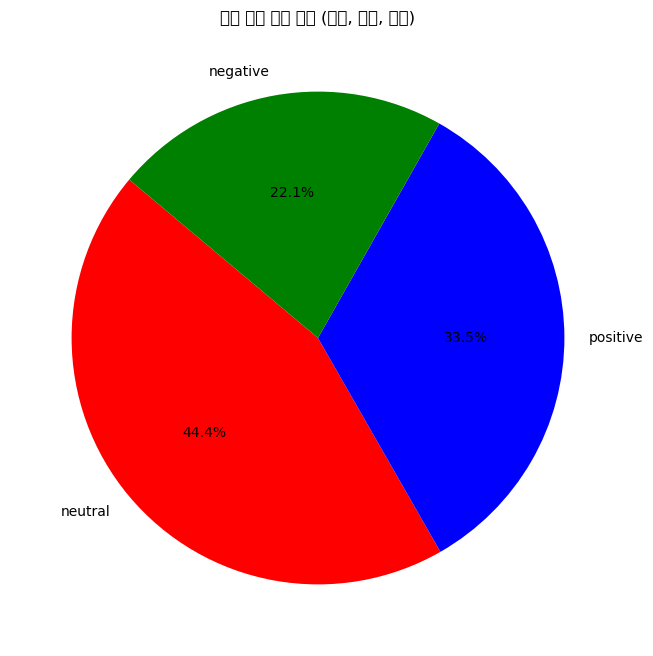

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from curr

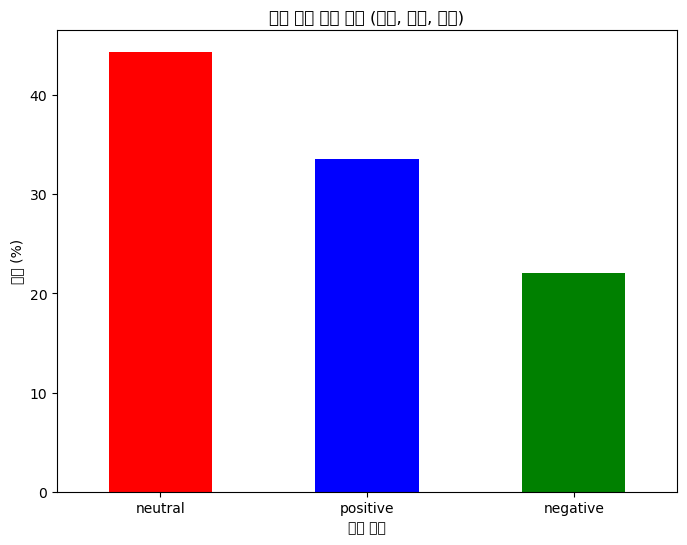

In [134]:
 # 감성 분석 결과(긍정, 중립, 부정)의 비율을 계산
sentiment_counts = df_cleaned['predicted_label'].value_counts(normalize=True) * 100

# 감성 분석 결과를 시각화 (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['red', 'blue', 'green']
)
plt.title("감성 분석 결과 비율 (긍정, 중립, 부정)")
plt.show()

# 감성 분석 결과를 시각화 (막대 그래프)
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel("감성 유형")
plt.ylabel("비율 (%)")
plt.title("감성 분석 결과 비율 (긍정, 중립, 부정)")
plt.xticks(rotation=0)
plt.show()

In [88]:
wordCloud = WordCloud(
    font_path = "malgun",
    width = 400,
    height = 400,
    max_font_size = 100,
    background_color = 'white'
).generate_from_frequencies(wc)


(-0.5, 399.5, 399.5, -0.5)

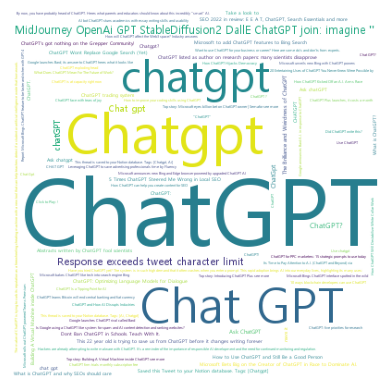

In [89]:
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')

In [105]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import nltk

# NLTK 토큰화 관련 라이브러리 다운로드
nltk.download('punkt')

# 결측치 제거
df_cleaned = df.dropna()

# 텍스트를 토큰화
sentences = df_cleaned["Text"].apply(lambda x: word_tokenize(str(x).lower()))

# FastText 모델 학습 (사전 훈련 없이 직접 학습)
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# 특정 단어의 임베딩 벡터 확인 (예: "chatgpt")
word = "chatgpt"
if word in fasttext_model.wv:
    print(f"'{word}'의 벡터 값:\n", fasttext_model.wv[word])

# 각 문장의 평균 임베딩 벡터 생성
def get_sentence_embedding(sentence):
    vectors = [fasttext_model.wv[word] for word in sentence if word in fasttext_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)  # 100차원 벡터
    return np.mean(vectors, axis=0)

# 모든 문장에 대해 벡터 변환
sentence_embeddings = np.array([get_sentence_embedding(sentence) for sentence in sentences])

# 벡터화된 데이터를 데이터프레임으로 변환
columns = [f"dim_{i}" for i in range(100)]  # 100차원 벡터
fasttext_df = pd.DataFrame(sentence_embeddings, columns=columns)

# 결과 확인
print(fasttext_df.head())

# 벡터화된 데이터 저장 (선택 사항)
fasttext_df.to_csv("fasttext_embeddings.csv", index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'chatgpt'의 벡터 값:
 [ 0.08466452  0.06130913 -0.16469617 -0.34948972 -0.3218972   0.04619449
  0.11771425  0.51122236 -0.15812747 -0.20304406 -0.12770286 -0.1118037
  0.21632688 -0.04510659  0.37465733 -0.02185874 -0.39628175 -0.24698798
 -0.69669306 -0.60432327 -0.1485066  -0.27291465  0.31411383  0.07192756
 -0.51891917 -0.09449088 -0.48519632 -0.19857231  0.44570616  0.43525228
  0.2774838   0.11964078  0.01171628  0.29899046  0.11547149  0.17368542
 -0.06545521 -0.03811041  0.18309651 -0.15533249  0.23522653 -0.06888427
 -0.2896131   0.03989835  0.15532352  0.00135166 -0.10838623  0.12309506
 -0.00452412 -0.08202628 -0.21416181 -0.09678959  0.21645232 -0.27773434
  0.20707765 -0.26082402 -0.14083771 -0.47661716 -0.16253401 -0.04567782
  0.03410807 -0.39111823  0.37274098 -0.00109501  0.13101672  0.49489403
 -0.01810677  0.15490884 -0.177235   -0.278821    0.08339304 -0.19636843
  0.65896255 -0.04016357 -0.18269114  0.5713028   0.48420358  0.07756597
 -0.15481344  0.0671657  -0.441268

In [110]:
#Fast Text 워드 임베딩 결과
fasttext_df.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,-0.006120,0.157002,-0.121729,-0.196795,-0.180652,-0.067670,-0.006145,0.446333,-0.200659,-0.187042,...,0.016021,0.041585,-0.081241,0.187968,-0.003583,-0.040570,0.051860,-0.207228,0.057679,-0.255322
1,0.015831,0.031326,-0.074158,-0.205084,-0.276303,-0.050704,0.040379,0.416434,-0.165620,-0.246748,...,-0.033082,0.163201,-0.083007,0.127182,-0.076302,-0.043719,0.017822,0.007176,0.029059,-0.339508
2,0.033111,0.174377,-0.002276,-0.293408,-0.003715,0.007127,0.044155,0.415692,-0.080755,-0.213273,...,0.095048,-0.050667,-0.133137,0.242105,-0.045242,-0.043183,0.013968,-0.145194,-0.121833,-0.269513
3,0.019709,0.052007,-0.049722,-0.205462,-0.200980,-0.061061,-0.011725,0.357731,-0.210554,-0.170314,...,0.116063,0.093959,-0.059604,0.110351,-0.047156,-0.079889,0.027193,-0.109611,0.060971,-0.213453
4,0.061415,0.049943,-0.094642,-0.184309,-0.229167,-0.129272,0.040427,0.381351,-0.265541,-0.174495,...,0.060088,0.063791,-0.059736,0.155492,0.017594,-0.064422,0.084038,-0.165351,0.053366,-0.307629


In [109]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize

# 텍스트 데이터 벡터화 (TF-IDF 사용)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned["Text"])

# 레이블 인코딩
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
y = df_cleaned["predicted_label"].map(label_mapping)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 모델 평가
y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7100526315789474
              precision    recall  f1-score   support

          -1       0.69      0.60      0.64      4428
           0       0.68      0.72      0.70      6710
           1       0.75      0.76      0.75      7862

    accuracy                           0.71     19000
   macro avg       0.71      0.70      0.70     19000
weighted avg       0.71      0.71      0.71     19000



C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# 결측치 제거
df_cleaned = df.dropna()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned["Text"])

# 레이블 인코딩
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
y = df_cleaned["predicted_label"].map(label_mapping)

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = lr_model.predict(X_test)

# 정밀도 계산
precision = precision_score(y_test, y_pred, average='weighted')
print(f"🔍 모델의 전체 정밀도(Precision): {precision:.4f}")

# 무작위로 긍정으로 예측된 텍스트 샘플 테스트
def test_positive_precision(n=5):
    positive_indices = [i for i in range(len(y_pred)) if y_pred[i] == 1]  # 모델이 긍정으로 예측한 인덱스
    
    if len(positive_indices) < n:
        print("⚠ 긍정으로 예측된 데이터가 부족합니다.")
        n = len(positive_indices)  # 가능한 샘플만 선택

    sample_indices = random.sample(positive_indices, n)
    samples = df_cleaned.iloc[sample_indices]
    
    for idx, row in samples.iterrows():
        text = row["Text"]
        true_label = row["predicted_label"]
        text_vectorized = vectorizer.transform([text])  # 문장 벡터화
        predicted_label = lr_model.predict(text_vectorized)[0]
        
        # 숫자 레이블을 감성 라벨로 변환
        inverse_label_mapping = {1: 'positive', 0: 'neutral', -1: 'negative'}
        predicted_label_text = inverse_label_mapping[predicted_label]
        
        print(f"📌 원본 텍스트: {text}")
        print(f"✅ 실제 감성: {true_label}")
        print(f"🔍 예측 감성: {predicted_label_text}")
        print("-" * 60)

# 테스트 실행 (긍정으로 예측된 샘플 5개 확인)
test_positive_precision(n=5)


🔍 모델의 전체 정밀도(Precision): 0.7099
📌 원본 텍스트: Inside ChatGPT is an AI that knows the truth thinking face
✅ 실제 감성: neutral
🔍 예측 감성: neutral
------------------------------------------------------------
📌 원본 텍스트: Search on new Will Bing replace Google? Answer backhand index pointing down: light skin tone
✅ 실제 감성: neutral
🔍 예측 감성: neutral
------------------------------------------------------------
📌 원본 텍스트: rolling on the floor laughing rolling on the floor laughing rolling on the floor laughing now I know why Chatgpt 3 is having feelings with you.
✅ 실제 감성: neutral
🔍 예측 감성: positive
------------------------------------------------------------
📌 원본 텍스트: recycling symbol One More Time: Network Break 416: Ericsson Flogs 5G Network Slicing For Laptops; Microsoft Loads Work Drudgery Onto ChatGPT
✅ 실제 감성: neutral
🔍 예측 감성: neutral
------------------------------------------------------------
📌 원본 텍스트: Not surprised. Im honestly wondering how many of these zomg chatgpt is WOKE pouting face face with s

C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
